In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'Churn.xlsx',index_col=0)

In [3]:
df = df.replace('Nan',np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   float6

In [5]:
df.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [6]:
df.state.value_counts()

state
WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

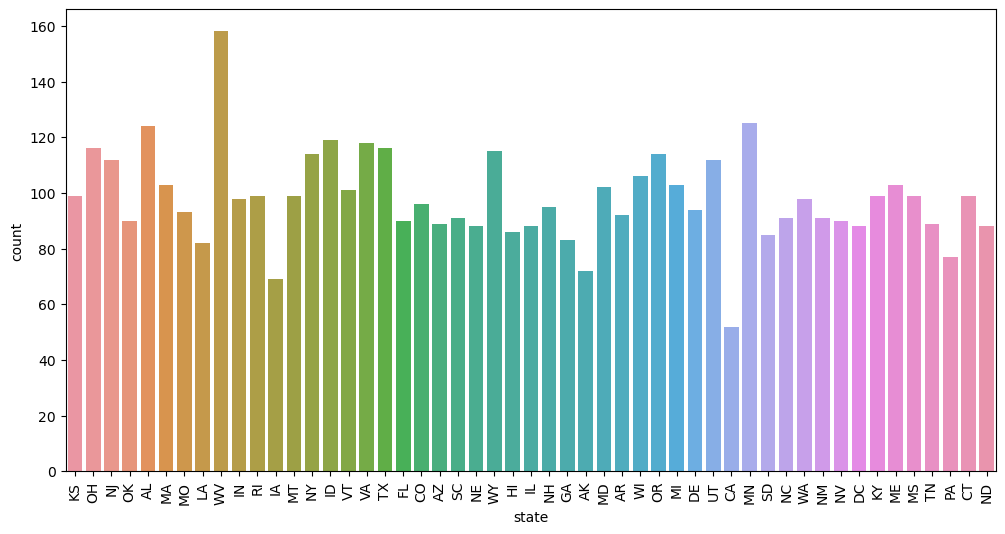

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'state',data = df)
plt.xticks(rotation=90)
plt.show()

In [10]:
df['area.code'].value_counts()

area.code
area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: count, dtype: int64

<Axes: xlabel='area.code', ylabel='count'>

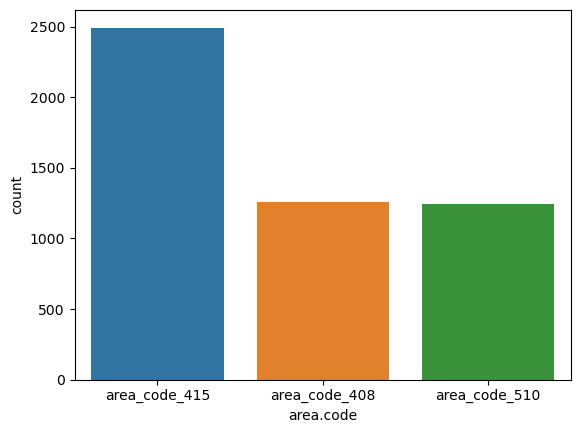

In [11]:
sns.countplot(x='area.code',data = df)

In [12]:
df['voice.plan'].value_counts()

voice.plan
no     3677
yes    1323
Name: count, dtype: int64

<Axes: xlabel='voice.plan', ylabel='count'>

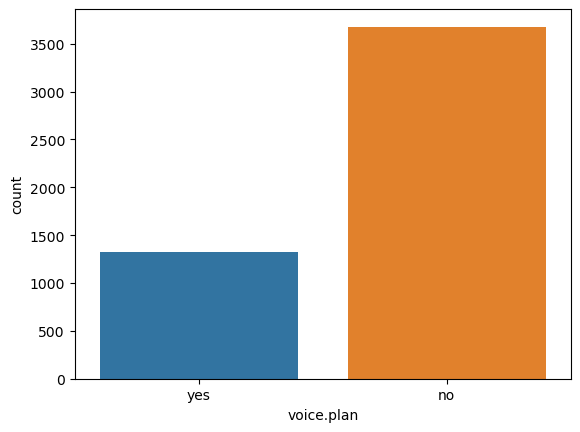

In [13]:
sns.countplot(x='voice.plan',data=df)

In [14]:
df['intl.plan'].value_counts()

intl.plan
no     4527
yes     473
Name: count, dtype: int64

<Axes: xlabel='intl.plan', ylabel='count'>

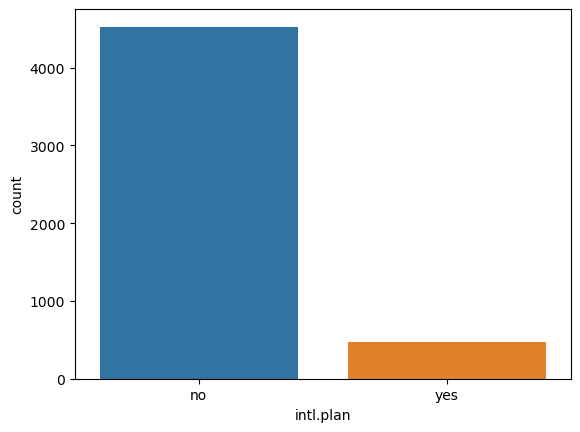

In [15]:
sns.countplot(x='intl.plan',data=df)

In [16]:
df['churn'].value_counts()

churn
no     4293
yes     707
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

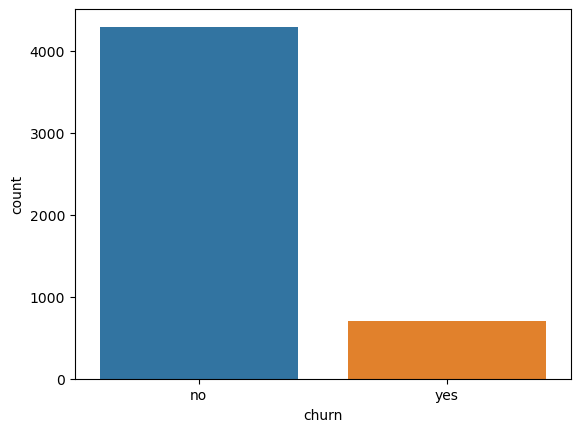

In [17]:
sns.countplot(x='churn',data=df)

In [18]:
df['customer.calls'].value_counts()

customer.calls
1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: count, dtype: int64

<Axes: xlabel='customer.calls', ylabel='count'>

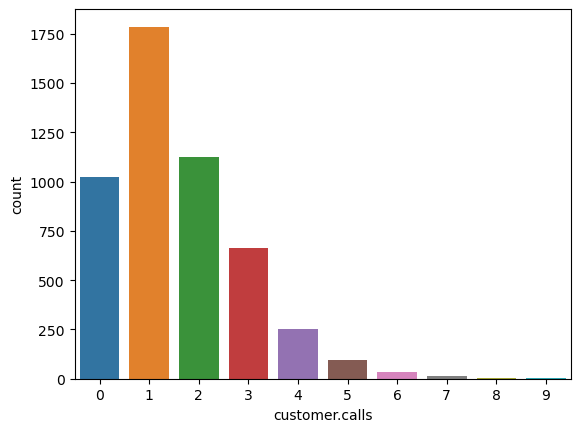

In [19]:
sns.countplot(x='customer.calls',data=df)

In [20]:
df.isna().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   float6

In [22]:
df['day.charge'].fillna(value = df['day.charge'].mean(),inplace=True)

In [23]:
df['eve.mins'].fillna(value = df['eve.mins'].mean(),inplace=True)

In [24]:
df.isna().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
df.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [27]:
df['intl.calls'].value_counts()

intl.calls
3     992
4     953
2     743
5     706
6     495
7     308
1     265
8     172
9     148
10     76
11     45
0      24
12     23
13     19
15      9
16      7
14      6
18      4
19      2
17      2
20      1
Name: count, dtype: int64

<Axes: xlabel='intl.calls', ylabel='count'>

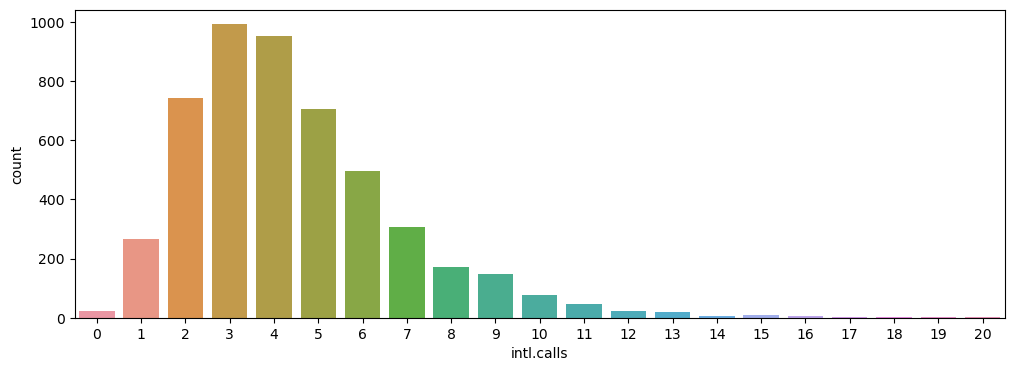

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(x='intl.calls',data=df)

In [29]:
df.corr(numeric_only=True)

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
account.length,1.000000,-0.014575,0.001291,0.014277,0.001292,-0.001017,0.028240,-0.000799,-0.008688,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445
voice.messages,-0.014575,1.000000,0.002463,0.000124,0.002505,0.005381,0.000883,0.005138,0.018862,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086
intl.mins,0.001291,0.002463,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.019281,-0.000346,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122
intl.calls,0.014277,0.000124,0.016791,1.000000,0.016900,-0.001303,0.010893,-0.001599,0.007987,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147
intl.charge,0.001292,0.002505,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.019211,-0.000323,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180
day.mins,-0.001017,0.005381,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.999767,-0.010907,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733
day.calls,0.028240,0.000883,0.013097,0.010893,0.013161,0.001935,1.000000,0.001665,-0.001724,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739
day.charge,-0.000799,0.005138,-0.019281,-0.001599,-0.019211,0.999767,0.001665,1.000000,-0.011534,0.007982,-0.011386,0.011315,0.004206,0.011299,0.002929
eve.mins,-0.008688,0.018862,-0.000346,0.007987,-0.000323,-0.010907,-0.001724,-0.011534,1.000000,0.003110,0.997662,-0.016501,0.015590,-0.016503,-0.012394
eve.calls,0.009143,-0.003954,-0.007458,0.005574,-0.007507,0.008128,0.003754,0.007982,0.003110,1.000000,0.002778,0.001781,-0.013682,0.001799,0.006235


<Axes: >

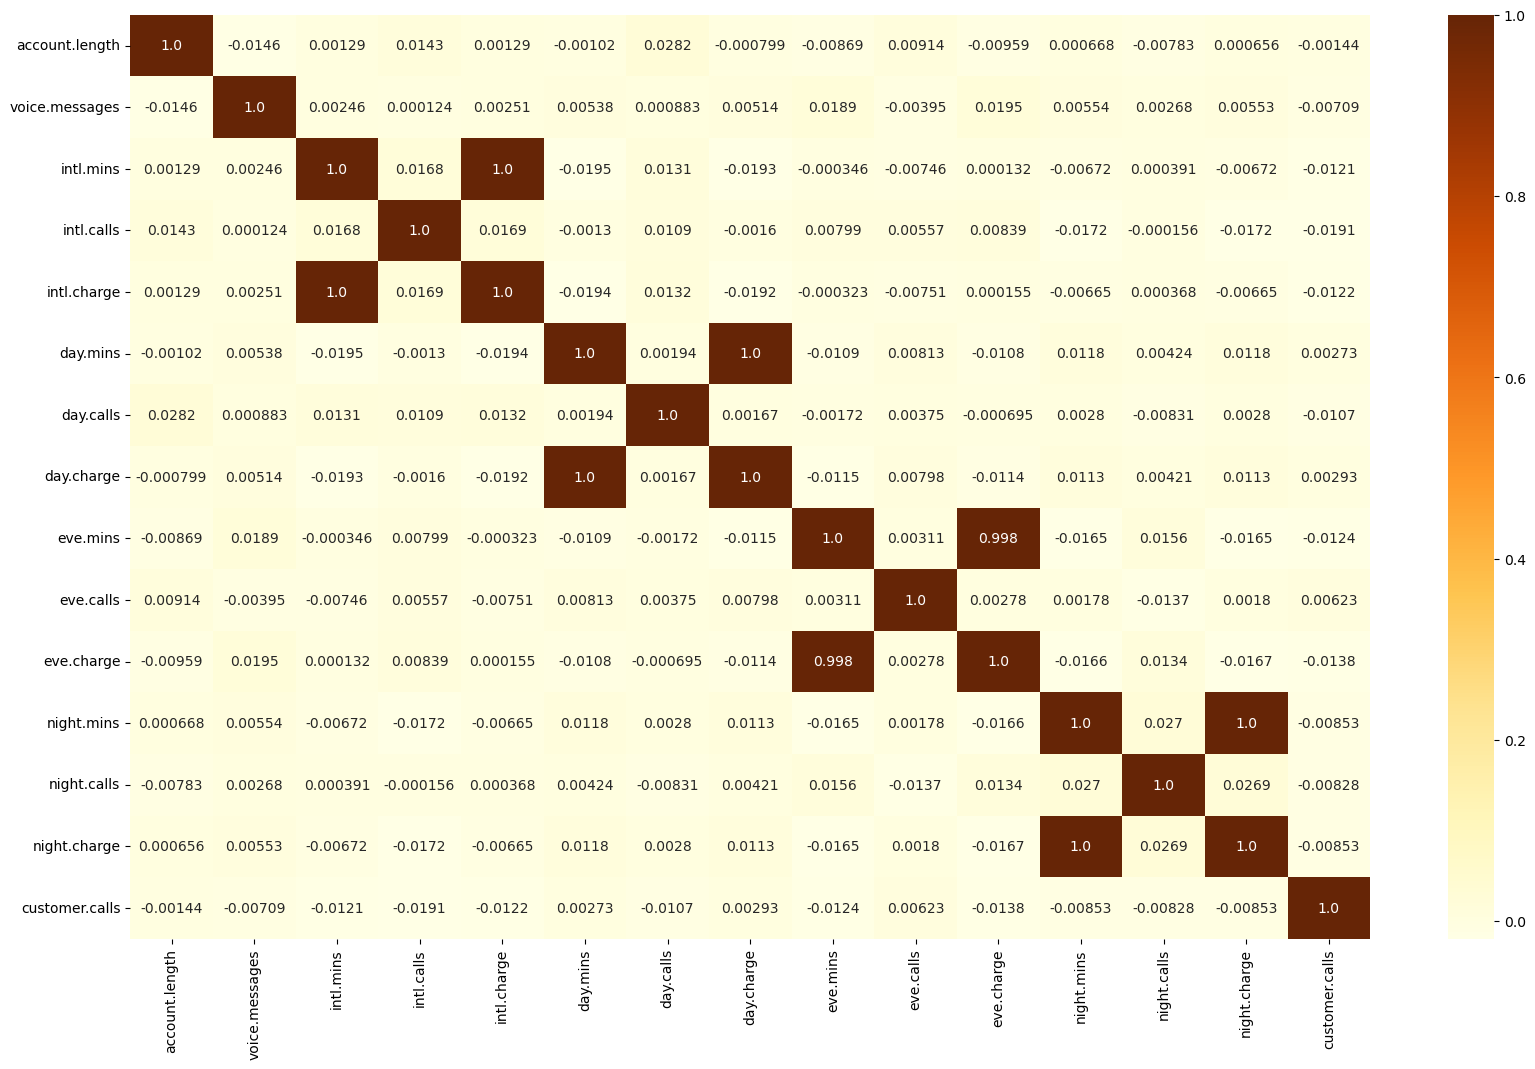

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='0.3',cmap='YlOrBr')

- intl.mins and intl.charge are highly correlated
- day.mins and day.charge are highly correlated
- eve.mins and eve.charge are highly correlated
- night.mins and night.charge are highly correlated

Hence we can remove all the charges column to avoid the case of intercorrelation

Text(0.5, 0, 'Churn')

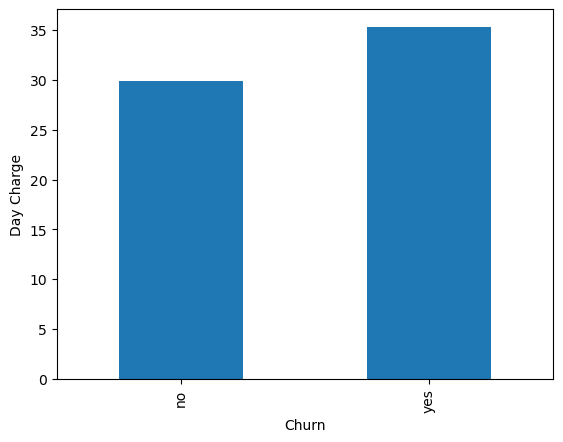

In [31]:
df.groupby('churn')['day.charge'].mean().plot.bar()
plt.ylabel('Day Charge')
plt.xlabel('Churn')

Text(0.5, 0, 'Churn')

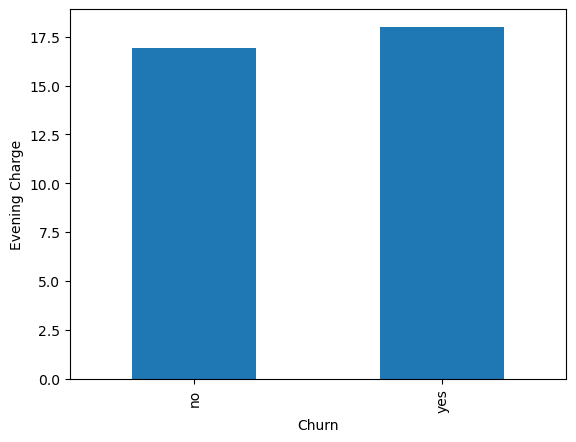

In [32]:
df.groupby('churn')['eve.charge'].mean().plot.bar()
plt.ylabel('Evening Charge')
plt.xlabel('Churn')

Text(0.5, 0, 'Churn')

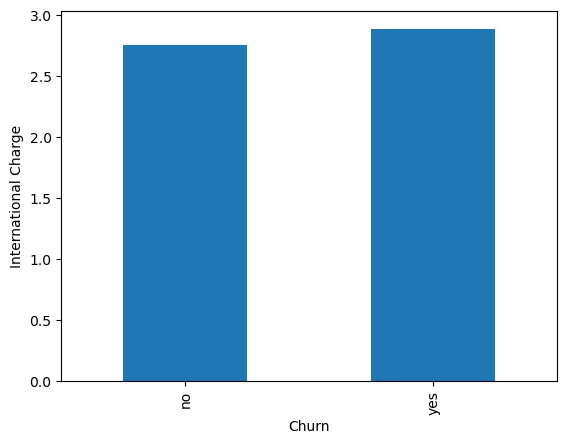

In [33]:
df.groupby('churn')['intl.charge'].mean().plot.bar()
plt.ylabel('International Charge')
plt.xlabel('Churn')

Text(0.5, 0, 'International Plan')

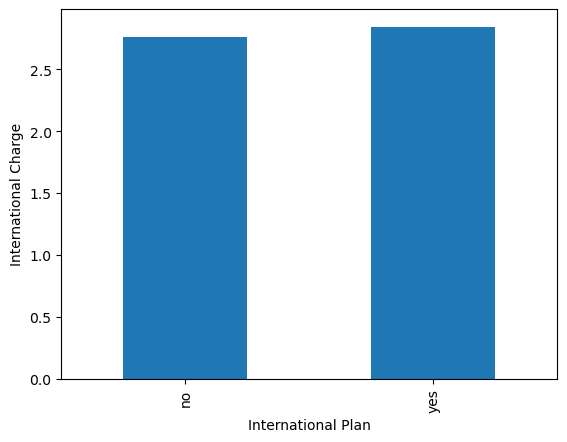

In [34]:
df.groupby('intl.plan')['intl.charge'].mean().plot.bar()
plt.ylabel('International Charge')
plt.xlabel('International Plan')

Text(0.5, 0, 'International Plan')

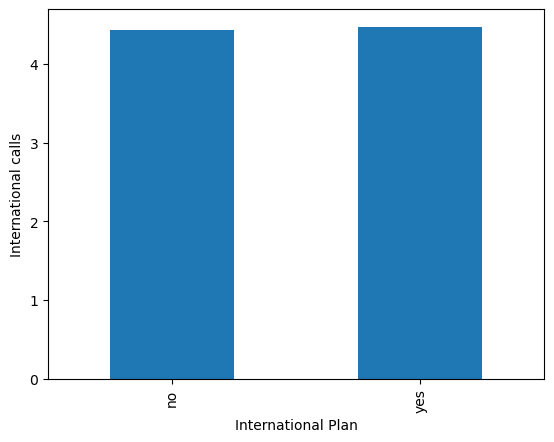

In [35]:
df.groupby('intl.plan')['intl.calls'].mean().plot.bar()
plt.ylabel('International calls')
plt.xlabel('International Plan')

Text(0.5, 0, 'Voice Messages')

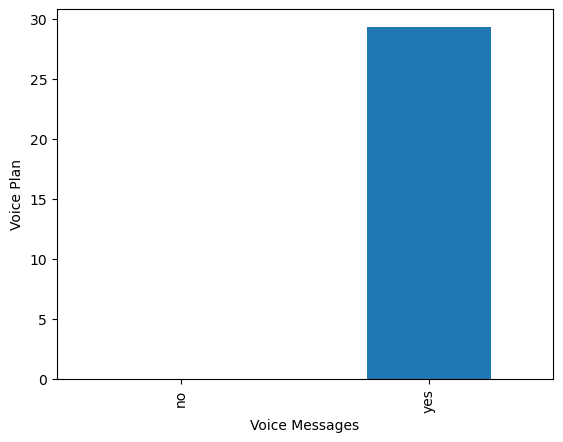

In [36]:
df.groupby('voice.plan')['voice.messages'].mean().plot.bar()
plt.ylabel('Voice Plan')
plt.xlabel('Voice Messages')

Text(0, 0.5, 'Account Length')

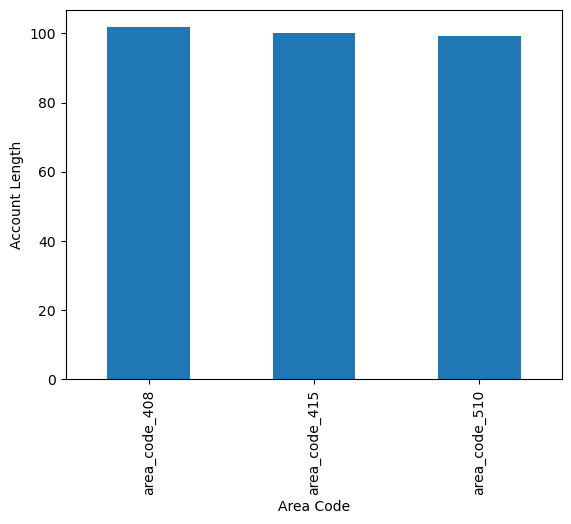

In [37]:
df.groupby('area.code')['account.length'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Account Length')

Text(0, 0.5, 'Voice Messages')

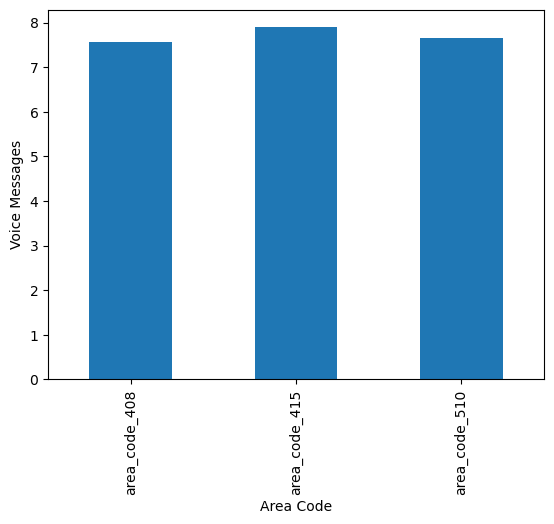

In [38]:
df.groupby('area.code')['voice.messages'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Voice Messages')

Text(0, 0.5, 'International Minutes')

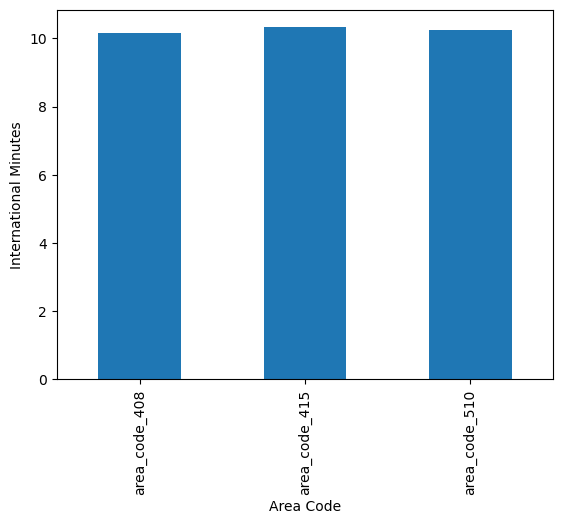

In [39]:
df.groupby('area.code')['intl.mins'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('International Minutes')

Text(0, 0.5, 'Day Minutes')

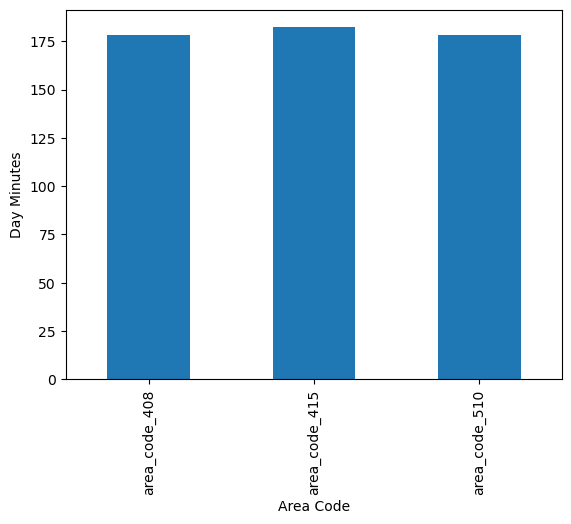

In [40]:
df.groupby('area.code')['day.mins'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Day Minutes')

Text(0, 0.5, 'International Charge')

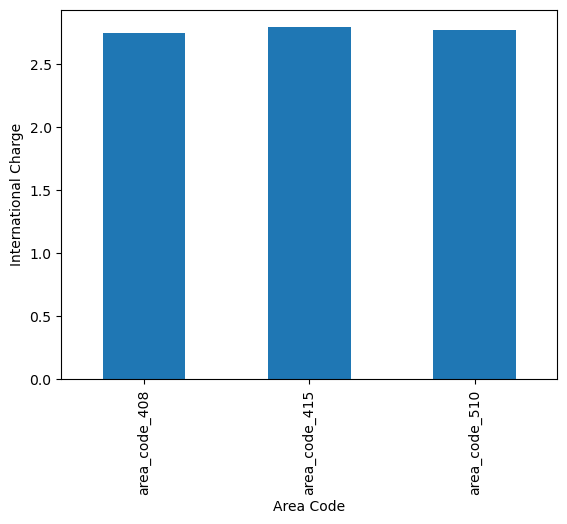

In [41]:
df.groupby('area.code')['intl.charge'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('International Charge')

Text(0, 0.5, 'International Calls')

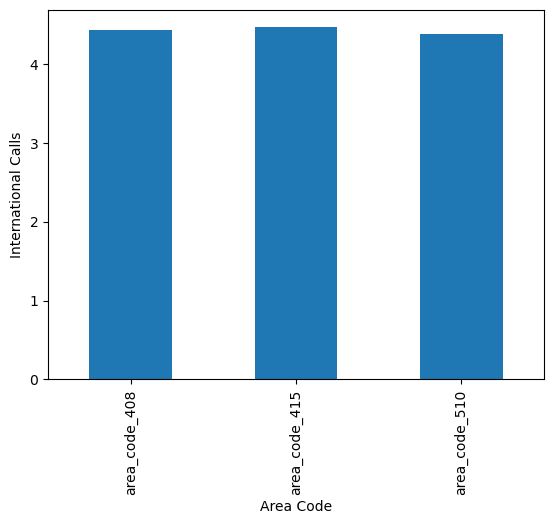

In [42]:
df.groupby('area.code')['intl.calls'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('International Calls')

Text(0, 0.5, 'Day Calls')

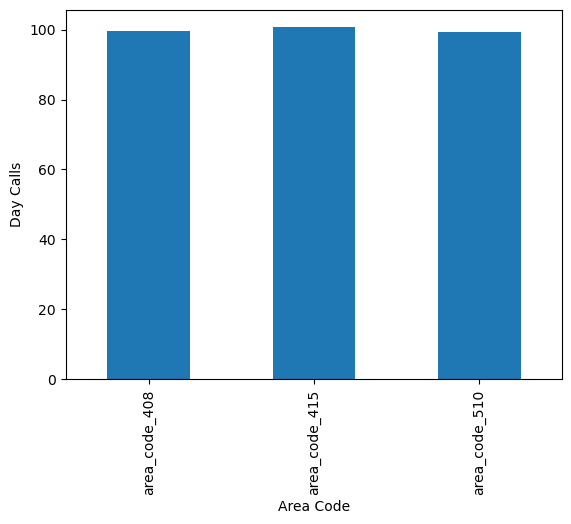

In [43]:
df.groupby('area.code')['day.calls'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Day Calls')

Text(0, 0.5, 'Day Charge')

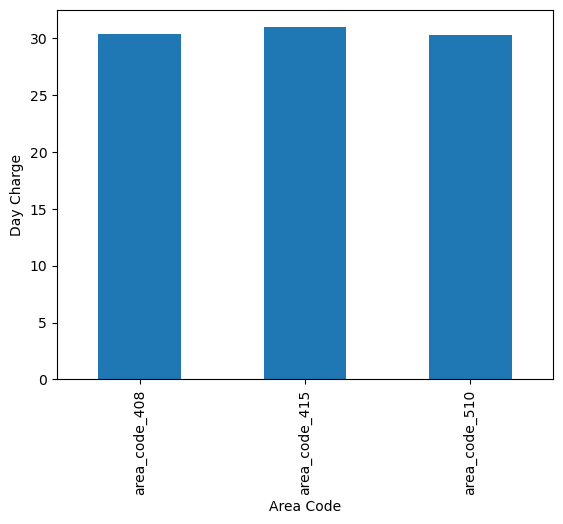

In [44]:
df.groupby('area.code')['day.charge'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Day Charge')

Text(0, 0.5, 'Eve Mins')

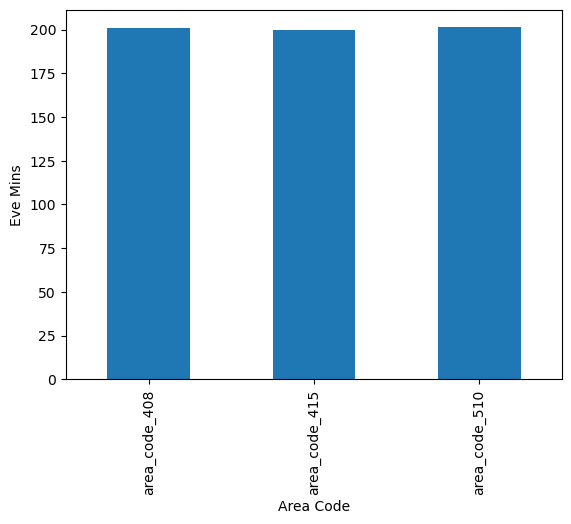

In [45]:
df.groupby('area.code')['eve.mins'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Eve Mins')

Text(0, 0.5, 'Eve Calls')

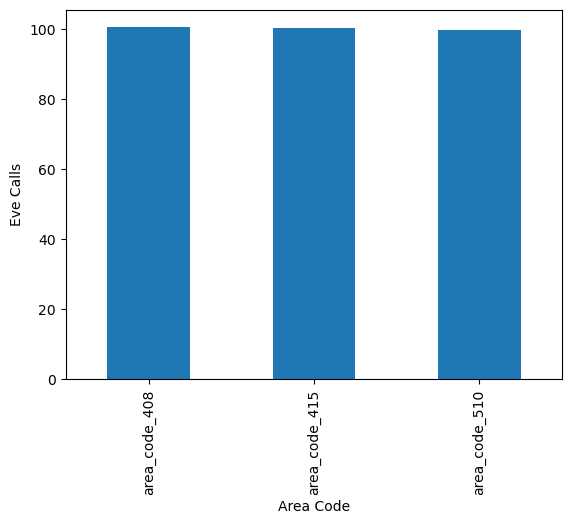

In [46]:
df.groupby('area.code')['eve.calls'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Eve Calls')

Text(0, 0.5, 'Eve Charge')

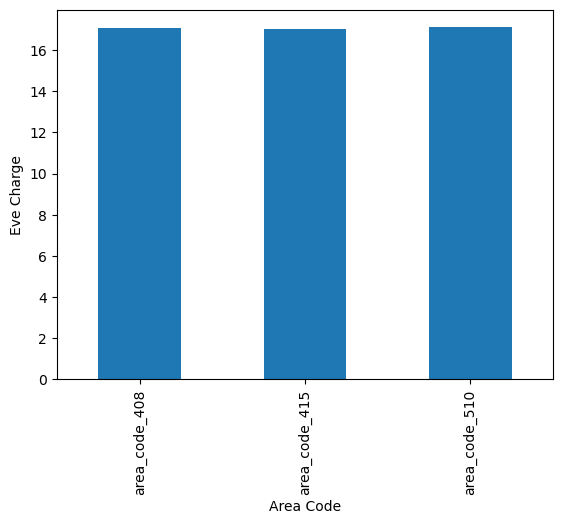

In [47]:
df.groupby('area.code')['eve.charge'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Eve Charge')

Text(0, 0.5, 'Night Mins')

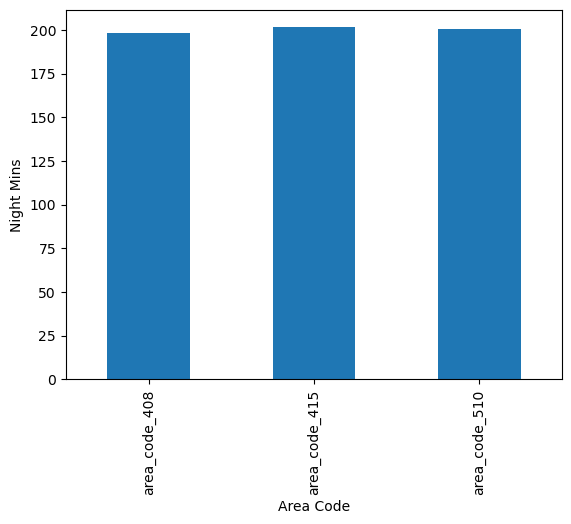

In [48]:
df.groupby('area.code')['night.mins'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Night Mins')

Text(0, 0.5, 'Night Calls')

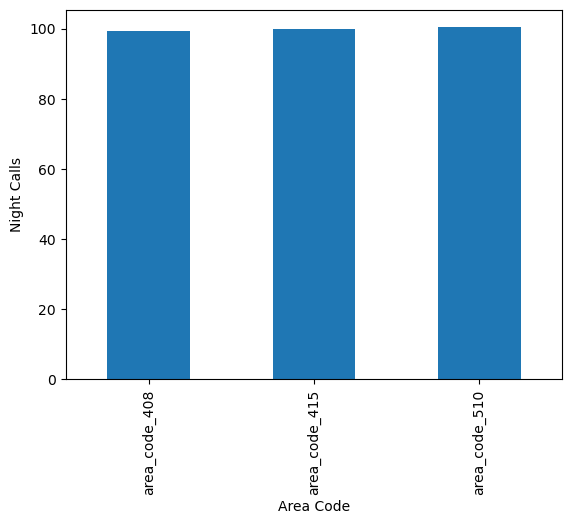

In [49]:
df.groupby('area.code')['night.calls'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Night Calls')

Text(0, 0.5, 'Night Charge')

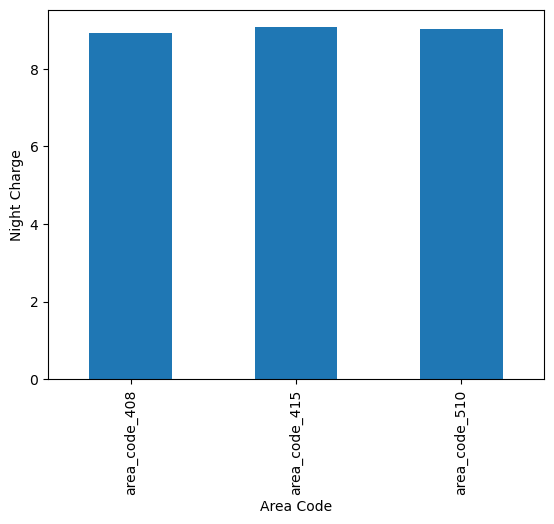

In [50]:
df.groupby('area.code')['night.charge'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Night Charge')

Text(0, 0.5, 'Customer Calls')

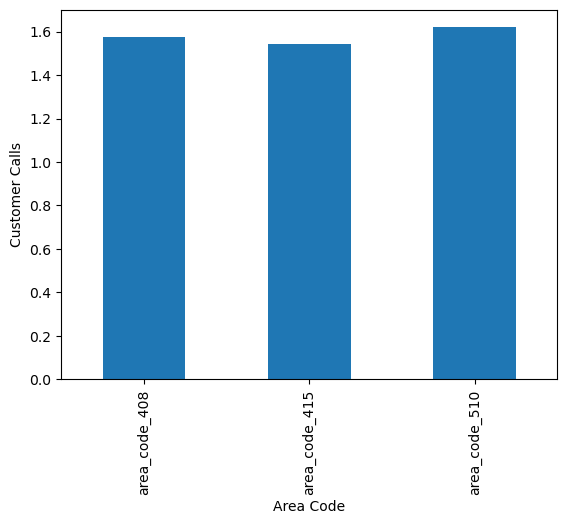

In [51]:
df.groupby('area.code')['customer.calls'].mean().plot.bar()
plt.xlabel('Area Code')
plt.ylabel('Customer Calls')

Text(0, 0.5, 'Customer Calls')

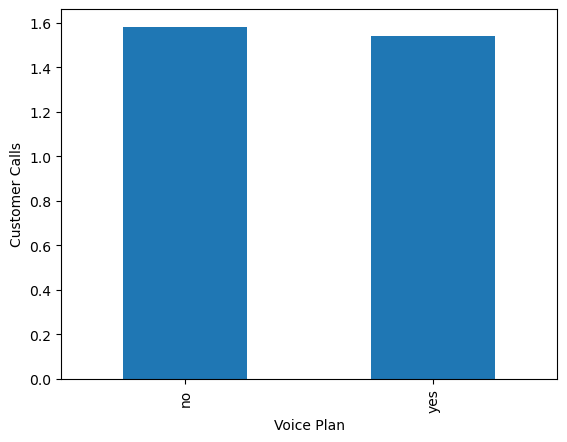

In [52]:
df.groupby('voice.plan')['customer.calls'].mean().plot.bar()
plt.xlabel('Voice Plan')
plt.ylabel('Customer Calls')

Text(0, 0.5, 'Intl Charge')

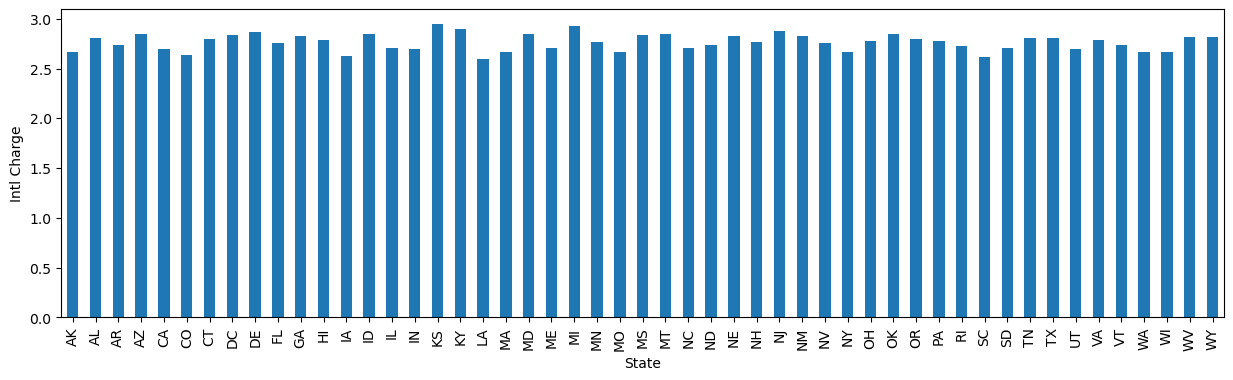

In [53]:
plt.figure(figsize=(15,4))
df.groupby('state')['intl.charge'].mean().plot.bar()
plt.xlabel('State')
plt.ylabel('Intl Charge')

Text(0, 0.5, 'Day Charge')

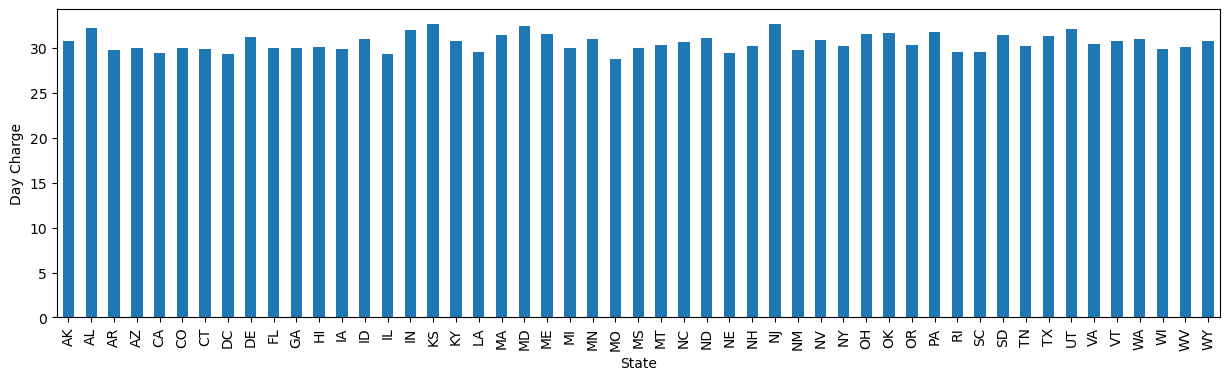

In [54]:
plt.figure(figsize=(15,4))
df.groupby('state')['day.charge'].mean().plot.bar()
plt.xlabel('State')
plt.ylabel('Day Charge')

Text(0, 0.5, 'Eve Charge')

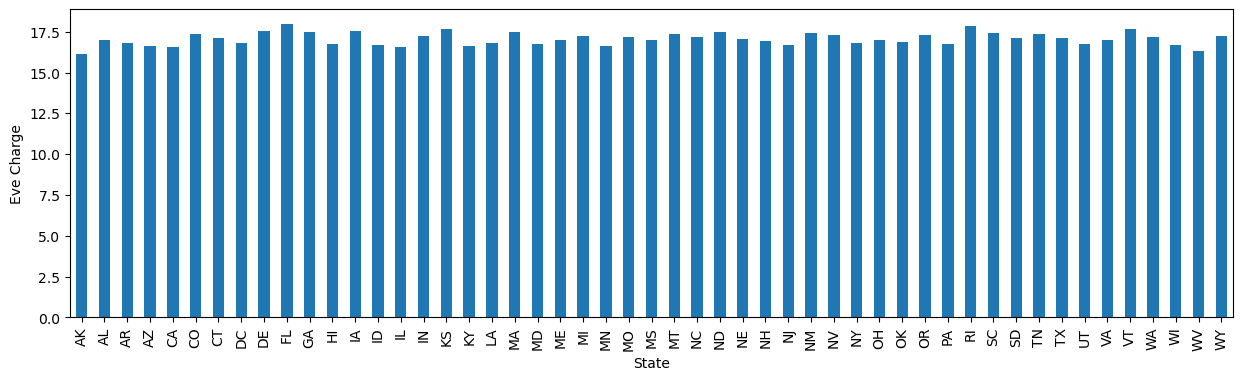

In [55]:
plt.figure(figsize=(15,4))
df.groupby('state')['eve.charge'].mean().plot.bar()
plt.xlabel('State')
plt.ylabel('Eve Charge')

Text(0, 0.5, 'Night Charge')

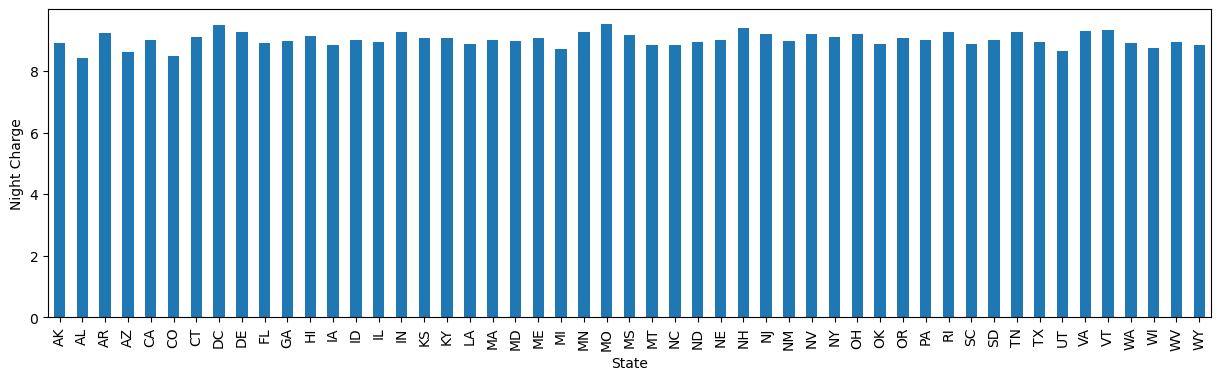

In [56]:
plt.figure(figsize=(15,4))
df.groupby('state')['night.charge'].mean().plot.bar()
plt.xlabel('State')
plt.ylabel('Night Charge')

In [57]:
df.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [61]:
churn = pd.get_dummies(df['churn'],drop_first=True).replace(True,1).replace(False,0)
churn

,yes
1,0
2,0
3,0
4,0
5,0
...,...
4996,0
4997,1
4998,0
4999,0


In [62]:
churn.value_counts(normalize=True)*100

yes
0      85.86
1      14.14
Name: proportion, dtype: float64

Our dataset is a imbalanced type of dataset that is the customer who are churning from the network are very few in percentage.

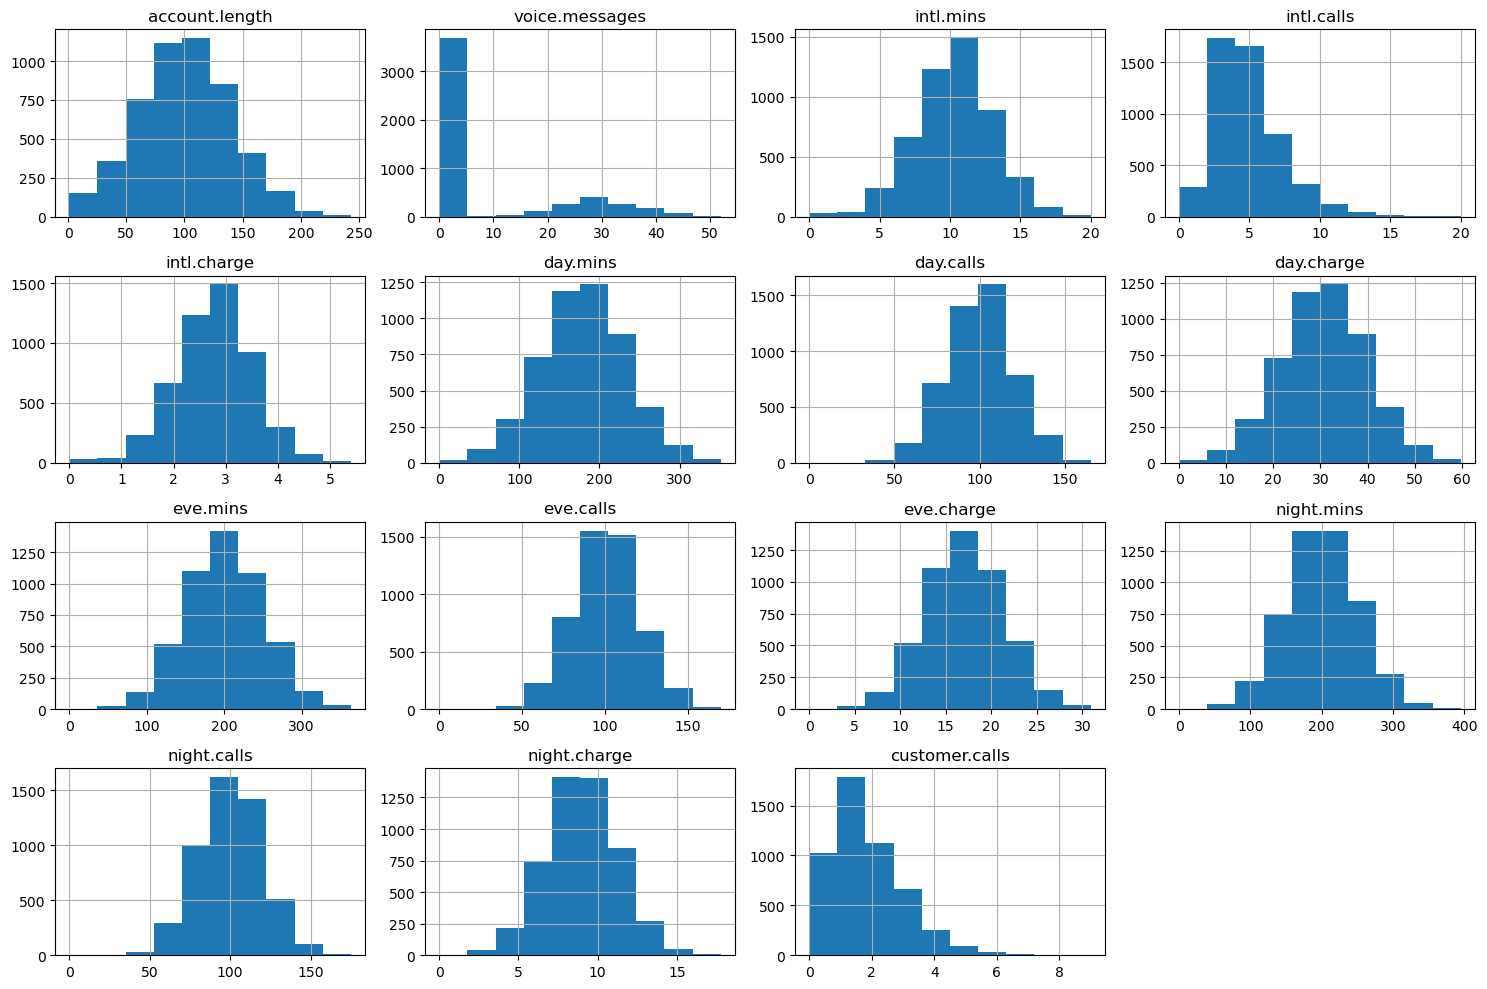

In [63]:
# plt.figure(figsize=(15,10))
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

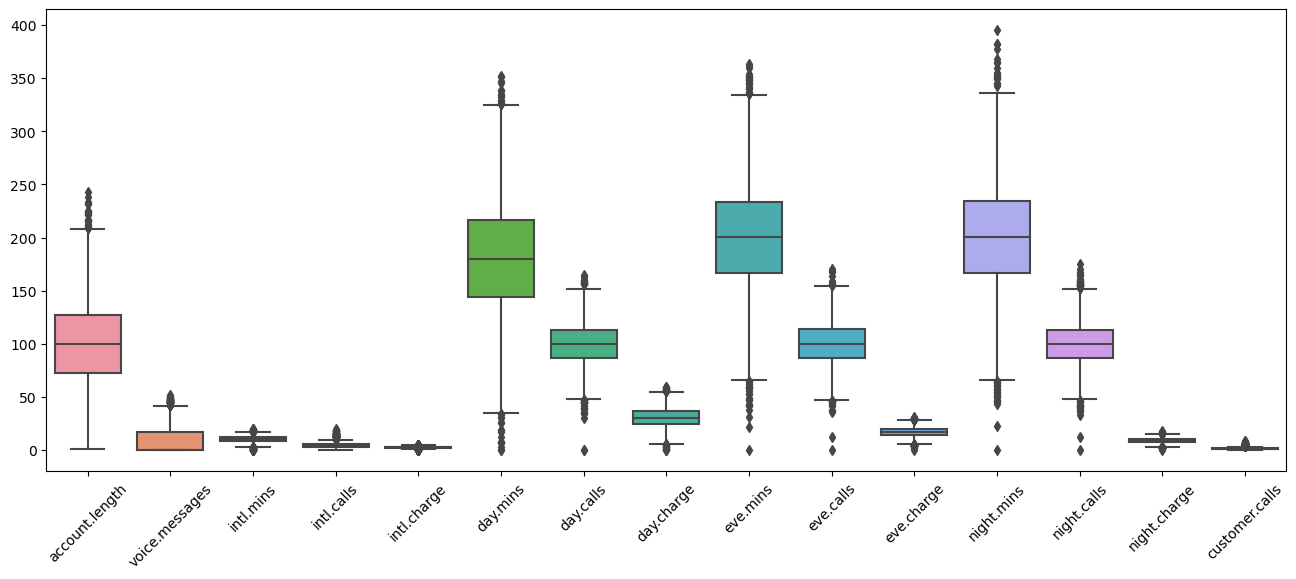

In [64]:
plt.figure(figsize=(16,6))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

# Treating the Outliers

In [65]:
def outliers(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    up = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    return up,ll

In [66]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
outliers(df,numerical_cols)

(account.length    208.000
 voice.messages     42.500
 intl.mins          17.250
 intl.calls         10.500
 intl.charge         4.650
 day.mins          324.950
 day.calls         152.000
 day.charge         55.230
 eve.mins          334.850
 eve.calls         154.500
 eve.charge         28.540
 night.mins        336.400
 night.calls       152.000
 night.charge       15.135
 customer.calls      3.500
 dtype: float64,
 account.length    -8.000
 voice.messages   -25.500
 intl.mins          3.250
 intl.calls        -1.500
 intl.charge        0.890
 day.mins          34.950
 day.calls         48.000
 day.charge         5.950
 eve.mins          65.650
 eve.calls         46.500
 eve.charge         5.500
 night.mins        65.200
 night.calls       48.000
 night.charge       2.935
 customer.calls    -0.500
 dtype: float64)

In [67]:
# df.loc[df['account.length']>208.000,'account.length'] = 208.000

# Capping the Outliers

In [91]:
for i in numerical_cols:
    up, ll = outliers(df, i)
    df.loc[df[i] > up, i] = up
    df.loc[df[i] < ll, i] = ll

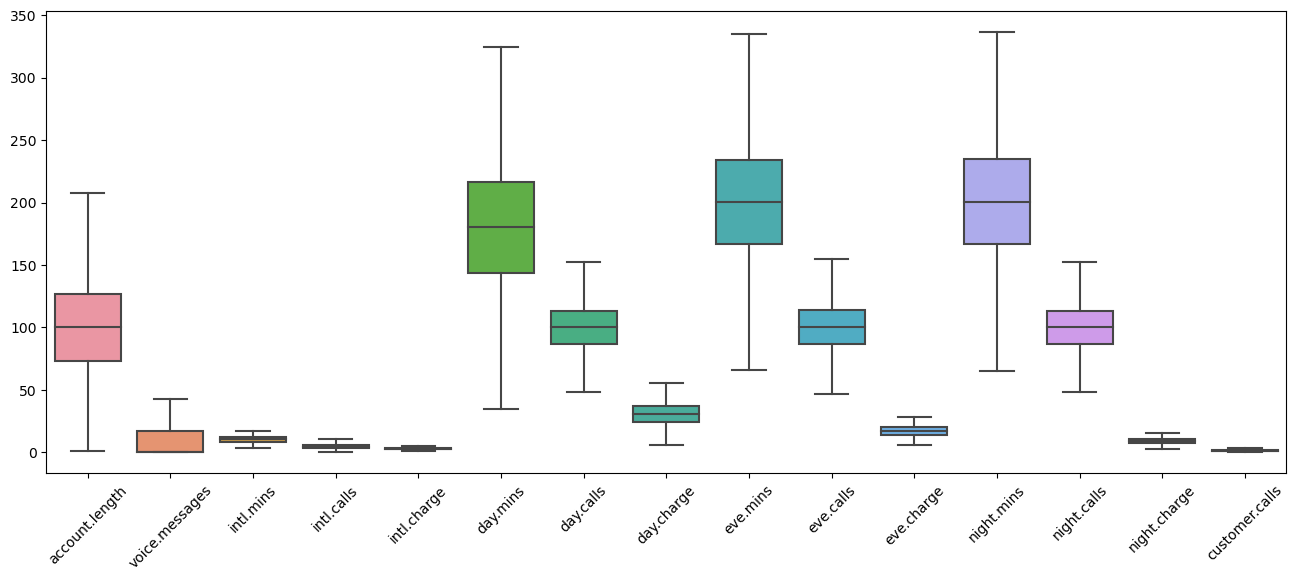

In [85]:
plt.figure(figsize=(16,6))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   float64
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   float64
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   float64
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   float6

In [93]:
df.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,1,25.0,0,10.0,3.0,2.70,265.1,110,45.07,197.40,99.0,16.78,244.7,91,11.01,1.0,0
2,OH,area_code_415,107,1,26.0,0,13.7,3.0,3.70,161.6,123,27.47,195.50,103.0,16.62,254.4,103,11.45,1.0,0
3,NJ,area_code_415,137,0,0.0,0,12.2,5.0,3.29,243.4,114,41.38,121.20,110.0,10.30,162.6,104,7.32,0.0,0
4,OH,area_code_408,84,0,0.0,1,6.6,7.0,1.78,299.4,71,50.90,65.65,88.0,5.50,196.9,89,8.86,2.0,0
5,OK,area_code_415,75,0,0.0,1,10.1,3.0,2.73,166.7,113,28.34,148.30,122.0,12.61,186.9,121,8.41,3.0,0


In [92]:
df['voice.plan'] = df['voice.plan'].replace('yes', 1).replace('no', 0)
df['intl.plan'] = df['intl.plan'].replace('yes', 1).replace('no', 0)
df['churn'] = df['churn'].replace('yes', 1).replace('no', 0)

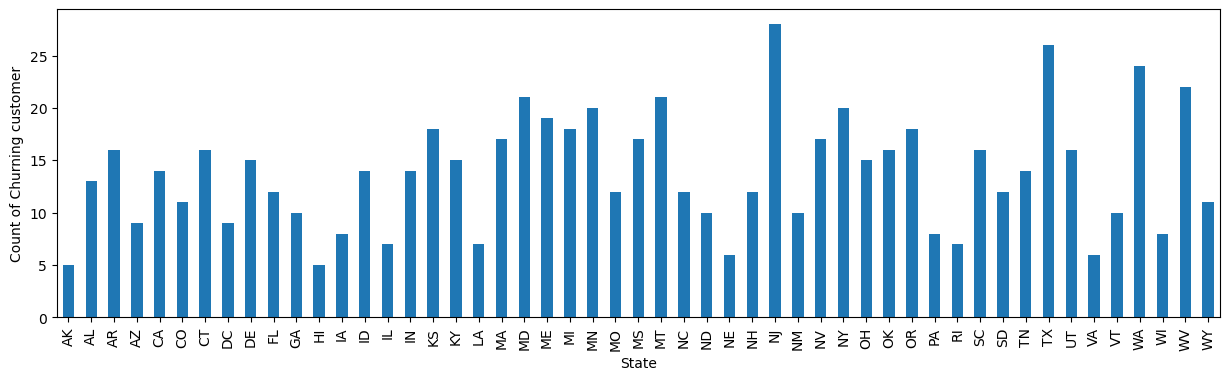

In [104]:
plt.figure(figsize=(15,4))
df.groupby('state')['churn'].sum().plot.bar()
plt.xlabel('State')
plt.ylabel('Count of Churning customer')
plt.xticks(rotation=90)
plt.show()

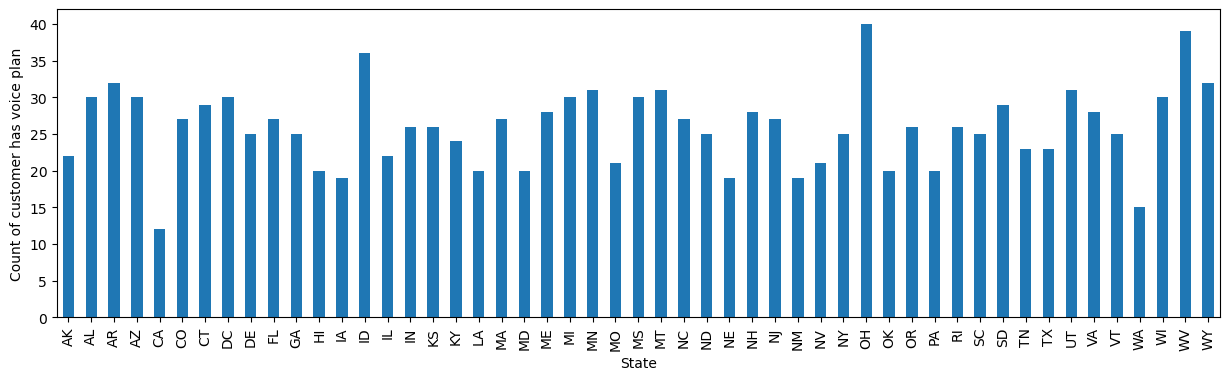

In [107]:
plt.figure(figsize=(15,4))
df.groupby('state')['voice.plan'].sum().plot.bar()
plt.xlabel('State')
plt.ylabel('Count of customer has voice plan')
plt.xticks(rotation=90)
plt.show()

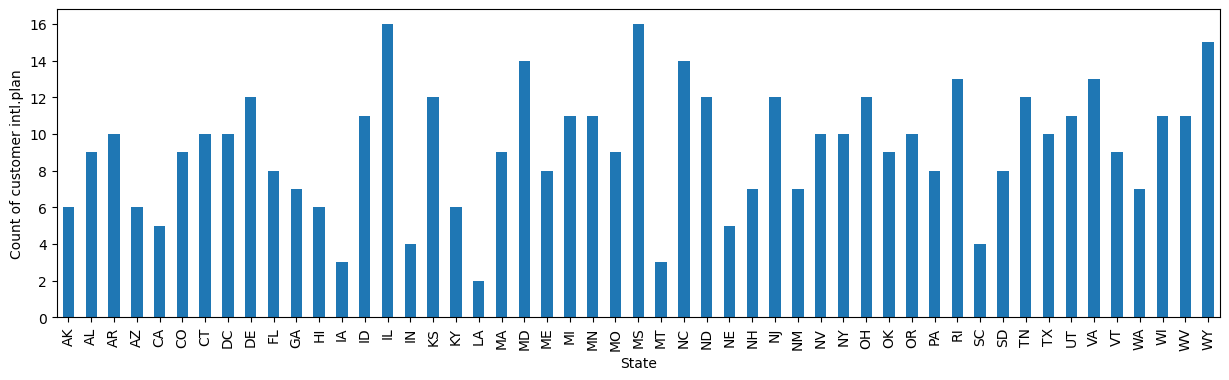

In [108]:
plt.figure(figsize=(15,4))
df.groupby('state')['intl.plan'].sum().plot.bar()
plt.xlabel('State')
plt.ylabel('Count of customer intl.plan')
plt.xticks(rotation=90)
plt.show()

In [109]:
df.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,1,25.0,0,10.0,3.0,2.70,265.1,110,45.07,197.40,99.0,16.78,244.7,91,11.01,1.0,0
2,OH,area_code_415,107,1,26.0,0,13.7,3.0,3.70,161.6,123,27.47,195.50,103.0,16.62,254.4,103,11.45,1.0,0
3,NJ,area_code_415,137,0,0.0,0,12.2,5.0,3.29,243.4,114,41.38,121.20,110.0,10.30,162.6,104,7.32,0.0,0
4,OH,area_code_408,84,0,0.0,1,6.6,7.0,1.78,299.4,71,50.90,65.65,88.0,5.50,196.9,89,8.86,2.0,0
5,OK,area_code_415,75,0,0.0,1,10.1,3.0,2.73,166.7,113,28.34,148.30,122.0,12.61,186.9,121,8.41,3.0,0


In [112]:
area = pd.get_dummies(df['area.code'],drop_first=True)
area

,area_code_415,area_code_510
1,True,False
2,True,False
3,True,False
4,False,False
5,True,False
...,...,...
4996,False,False
4997,True,False
4998,True,False
4999,False,True


In [113]:
state = pd.get_dummies(df['state'],drop_first=True)
state

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4998,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [114]:
df1 = pd.concat([df,state,area],axis=1)

In [117]:
df1 = df1.replace(True, 1).replace(False, 0)

In [120]:
df1.drop(['state', 'area.code'],axis=1,inplace=True)

In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  5000 non-null   int64  
 1   voice.plan      5000 non-null   int64  
 2   voice.messages  5000 non-null   float64
 3   intl.plan       5000 non-null   int64  
 4   intl.mins       5000 non-null   float64
 5   intl.calls      5000 non-null   float64
 6   intl.charge     5000 non-null   float64
 7   day.mins        5000 non-null   float64
 8   day.calls       5000 non-null   int64  
 9   day.charge      5000 non-null   float64
 10  eve.mins        5000 non-null   float64
 11  eve.calls       5000 non-null   float64
 12  eve.charge      5000 non-null   float64
 13  night.mins      5000 non-null   float64
 14  night.calls     5000 non-null   int64  
 15  night.charge    5000 non-null   float64
 16  customer.calls  5000 non-null   float64
 17  churn           5000 non-null   int64 

In [124]:
df1.shape

(5000, 70)

# VIF analysis

In [149]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [150]:
numerical_cols

Index(['account.length', 'voice.plan', 'voice.messages', 'intl.plan',
       'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls',
       'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins',
       'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [165]:
vif = pd.DataFrame()
vif['fearure'] = df[numerical_cols].columns
vif["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(df[numerical_cols].columns))]
vif['VIF'] = vif['VIF'].round()
vif

,fearure,VIF
0,account.length,7.0
1,voice.plan,16.0
2,voice.messages,16.0
3,intl.plan,1.0
4,intl.mins,866691.0
5,intl.calls,5.0
6,intl.charge,867927.0
7,day.mins,26211.0
8,day.calls,23.0
9,day.charge,26220.0


In [163]:
vif_col = df1[['account.length', 'voice.plan', 'voice.messages', 
        'intl.calls', 'intl.charge', 'day.calls',
       'day.charge', 'eve.calls', 'eve.charge',
       'night.calls', 'night.charge', 'customer.calls', 'churn']]

Columns to drop
- 'intl.plan'
- 'intl.mins'
- 'day.mins'
- 'night.mins'
- 'eve.mins'

In [164]:
vif = pd.DataFrame()
vif['fearure'] = vif_col.columns
vif["VIF"] = [variance_inflation_factor(vif_col.values, i) for i in range(len(vif_col.columns))]
vif['VIF'] = vif['VIF'].round()
vif

,fearure,VIF
0,account.length,7.0
1,voice.plan,16.0
2,voice.messages,16.0
3,intl.calls,5.0
4,intl.charge,14.0
5,day.calls,23.0
6,day.charge,12.0
7,eve.calls,22.0
8,eve.charge,15.0
9,night.calls,22.0


Now The VIFs looks good.

In [167]:
df1.drop(['intl.plan', 'intl.mins', 'day.mins', 'night.mins', 'eve.mins'],axis=1,inplace=True)

# Spliting

In [168]:
X = df1.drop('churn',axis=1)
y = df1['churn']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [170]:
X_train.shape

(3500, 64)

In [171]:
X_test.shape

(1500, 64)

In [172]:
y_train.shape

(3500,)

In [173]:
y_test.shape

(1500,)